In [35]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('F:\DATA ANALYST\ResidualAnalysis.xlsx')
data

,Restaurant,Student Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


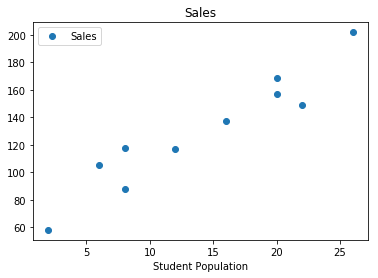

In [4]:
data.plot('Student Population','Sales',style='o')
plt.title('Sales')
plt.show()

In [7]:
st_pop=data['Student Population']
sales=data['Sales']
st_pop=sm.add_constant(st_pop)
model1=sm.OLS(sales,st_pop)
result1=model1.fit()
result1.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000011643D4BE10>>

In [9]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           2.55e-05
Time:                        13:08:30   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

C:\Users\Manjot singh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
x=data['Student Population'].values.reshape(-1,1)
y=data['Sales'].values.reshape(-1,1)

In [12]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
reg.intercept_[0],reg.coef_[0][0]

(60.0, 5.0)

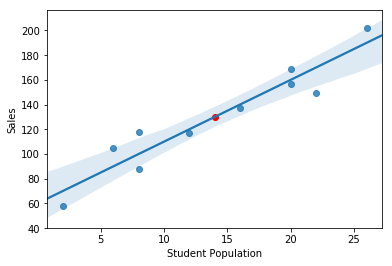

In [15]:
x=data['Student Population']
y=data['Sales']
plt.figure()
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color='red')

In [22]:
#Prediction Interval
from statsmodels.stats.outliers_influence import summary_table
st,data1,ss2=summary_table(result1,alpha=0.05)
fittedvalues=data1[:,2]
predict_mean_se=data1[:,3]
predict_mean_ci_low,predict_mean_ci_upp=data1[:,4:6].T
predict_ci_low,predict_ci_upp=data1[:,6:8].T

In [23]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [24]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [25]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [26]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

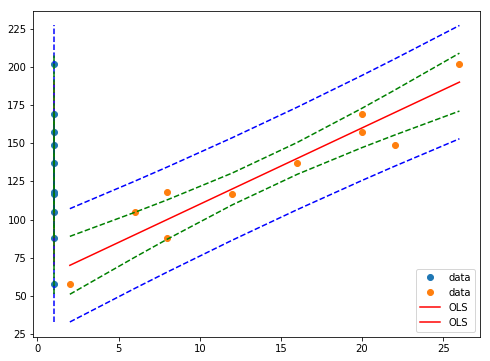

In [33]:
X=sm.add_constant(x)
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(X,y,'o',label='data')
ax.plot(X,fittedvalues,'r-',label='OLS')
ax.plot(X,predict_ci_low,'b--')
ax.plot(X,predict_ci_upp,'b--')
ax.plot(X,predict_mean_ci_upp,'g--')
ax.plot(X,predict_mean_ci_low,'g--')
ax.legend(loc='best')
plt.show()

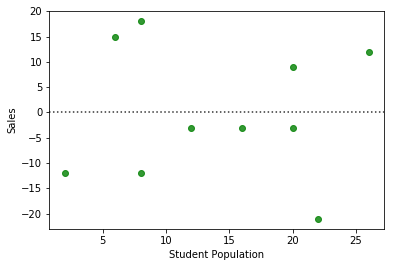

In [37]:
#Residual Plot
sns.residplot(data['Student Population'],data['Sales'],color='g')